## Importing Libraries 


In [145]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [146]:
# reading dataset

data = pd.read_csv('adult.csv')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## EDA

In [147]:
data.shape

(32560, 15)

In [148]:
cols = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
data.columns = cols 
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [149]:
# in above data we can see that columns names was not in ordered
# here we correct it and get in sequentially  arragned so can able to read and understand data 
data.head(5)        
                

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exploring categorical variable of columns

In [151]:
# finding categorical variable 

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [152]:
data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [153]:
# check missing values in categorical variables 

data[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

### Frequency count of categorical variables 

In [154]:
for var in categorical:
    print(data[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [155]:
# frequency distribution count 

for var in categorical:
    print(data[var].value_counts()/np.float(len(data)))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

### Explore workclass Variables 

In [156]:
data.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [157]:
# check frequency distribution of workclass variable 

data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

we can see that there are 1836 vales which are missing and encoded as ?      will replace it with NaN

In [158]:
# replace '?' with 'Nan' in workclass variables.

data["workclass"]= data["workclass"].str.replace('?','NaN')
#data['workclass'].replace('?', np.NaN , inplace = True)


In [159]:
# again check the frequency distribution of values in workclass varible

data.workclass.value_counts()       

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 NaN                  1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

### Exploring Occupation variable 

In [160]:
data.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [161]:
# lets check the frequecy distribution of occupation variable 
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

now we hav the 1843 values in '?' format    
need to change it with 'NaN' 

In [162]:
data["occupation"] = data["occupation"].str.replace('?','Nan')
#data['occupation'].replace('?', np.NaN , inplace = True)

In [163]:
# again will check the frequncy distribution of occupation variabl 

data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Nan                  1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

### Explore Native Country Variable

In [164]:
data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [165]:
# checking the frequecny distribution of native county variable 

data.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

so ther are 583 values which are not defined encodded in '?' so will convert it with Nan 

In [166]:
data["native_country"] = data["native_country"].str.replace('?','NaN')

#data['native_country'].replace('?', np.NaN , inplace = True)

In [167]:
# now again checking the frequncy distribution to check values has been replaced or not 

data.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 NaN                             583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Check missing values in categorical variable

In [168]:
data[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [169]:
# check the cardinality in categorical variable 

for var in categorical:
    
    print(var, 'contains ', len(data[var].unique()),'lables')

workclass contains  9 lables
education contains  16 lables
marital_status contains  7 lables
occupation contains  15 lables
relationship contains  6 lables
race contains  5 lables
sex contains  2 lables
native_country contains  42 lables
income contains  2 lables


Explore Numrical Variables

In [170]:

# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [171]:
data[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


Missing values in numerical variables

In [172]:
data[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

## Declare feature vaector and target variable 

In [173]:
X = data.drop(['income'], axis=1)
y = data['income']

## split data in train and test data set 

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=0)

In [175]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

## Feature Engineering 

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [176]:
# cheking the data type 

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [177]:
#display catgorical variable 
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [178]:
# display numerical variable 
numerical = [col for col in X_train.columns if X_train[col].dtypes != '0']
numerical

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

Engineering missing values in categorical variables 

In [179]:
# percetage of missing values in the categorical variables in training set 

X_train[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [180]:
# checking missing values in categoricle variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [181]:
# finally will check all missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [182]:
# do it same for X_test 

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

we can see that ther is no missing values in X_train and X_test 

Enoding categorical varialbes 

In [183]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [184]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


In [185]:
# importing encoding 
import category_encoders as ce

In [186]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship','race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [187]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
20721,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
X_train.shape

(22792, 108)

In [189]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
22278,40,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
X_test.shape

(9768, 108)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling

## Model Training

In [191]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor
from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import (
        XGBClassifier,
        XGBModel,
        XGBRanker,
        XGBRegressor,
        XGBRFClassifier,
        XGBRFRegressor,
    )
import warnings 

In [192]:
#Based on web search results, one possible way to take all supervised learning models in one list and get the output of each one individually is:

#Assuming you have imported the necessary libraries and defined X_train, X_test, y_train, y_test
#Create a list of supervised learning models
#models = [
   # LogisticRegression(),
   # KNeighborsClassifier(),
   # DecisionTreeClassifier(),
   # RandomForestClassifier(),
   # SVC(),
   # GaussianNB(),
   # LinearRegression(),
   # RandomForestRegressor(),
  #  DecisionTreeRegressor(),
 #   KNeighborsRegressor()
#]

#Create an empty list to store the results
#results = []

#Loop through the models list
#for model in models:
  #Fit the model on the training data
  #model.fit(X_train, y_train)
  #Predict on the test data
 # y_pred = model.predict(X_test)
  #Evaluate some metric (e.g. accuracy score for classification or mean squared error for regression)
  

#Print the results
#print(results)

In [193]:
# using KNeighbours Claassifier
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
y_pred = KN.predict(X_test)
y_pred

# checking accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred , y_test)
accuracy_score



0.7754914004914005

In [194]:
print('Training set score : {:.4}'.format(KN.score(X_train,y_train)))
print('Test Set score : {:.4}'.format(KN.score(X_test,y_test)))

Training set score : 0.8312
Test Set score : 0.7755


In [195]:
# using Logistic Regression 
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred

# checking accuracy score 

from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred , y_test)
accuracy_score

0.8018018018018018

In [196]:
print('Training set score : {:.4}'.format(LR.score(X_train,y_train)))
print('Test Set score : {:.4}'.format(LR.score(X_test,y_test)))

Training set score : 0.7957
Test Set score : 0.8018


In [197]:

# using Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
y_pred

# checking accuracy score 

from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred , y_test)
accuracy_score

0.8138820638820639

In [198]:
print('Training set score : {:.4}'.format(DTC.score(X_train,y_train)))
print('Test Set score : {:.4}'.format(DTC.score(X_test,y_test)))         # overfitting 

Training set score : 1.0
Test Set score : 0.8139


In [199]:
# using Random forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred

# checking accuracy score 

from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred , y_test)
accuracy_score

0.855958230958231

In [200]:
print('Training set score : {:.4}'.format(RF.score(X_train,y_train)))
print('Test Set score : {:.4}'.format(RF.score(X_test,y_test)))

Training set score : 1.0
Test Set score : 0.856


In [201]:
# using GaussianNb (Navie byes algorithm)
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred = GNB.predict(X_test)
y_pred

# checking accuracy score 

from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred , y_test)
accuracy_score

0.7993447993447993

In [202]:
print('Training set score : {:.4}'.format(GNB.score(X_train,y_train)))
print('Test Set score : {:.4}'.format(GNB.score(X_test,y_test)))

Training set score : 0.792
Test Set score : 0.7993


In [203]:
# using support vector machine algorithm
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred
# checking accuracy score 

from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred , y_test)
accuracy_score

0.7963759213759214

In [204]:
print('Training set score : {:.4}'.format(svc.score(X_train,y_train)))
print('Test Set score : {:.4}'.format(svc.score(X_test,y_test)))

Training set score : 0.7929
Test Set score : 0.7964


Here we come to know the all Modules Accuracy score 
1 = 

In [205]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7447    7]
 [1982  332]]

True Positives(TP) =  7447

True Negatives(TN) =  332

False Positives(FP) =  7

False Negatives(FN) =  1982


<AxesSubplot: >

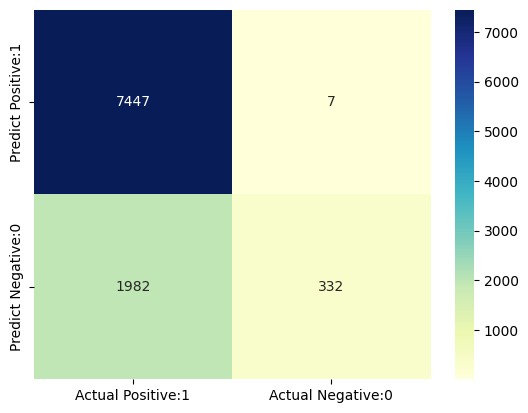

In [206]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      7454
        >50K       0.98      0.14      0.25      2314

    accuracy                           0.80      9768
   macro avg       0.88      0.57      0.57      9768
weighted avg       0.83      0.80      0.73      9768

